# Sustainable Crop Yield predictor

## Collaborators

- Sawit Anna Rica Alop
  contributed to the report, video and website
  
- Fazeelathunnisa D/O Jafar Sathik Basha
  contributed to the report, video and website
  
- Chadrick Liang Jing
  contributed to the report, video and website
  
- Vijayakumar Rittambhra Rani
  contributed to the report, video and website
  
- Daryl Lim Jing Hng
  contributed to the report, video and website

### Problem Statement
Food security is a critical global challenge, particularly in developing countries like Indonesia, where food scarcity is exacerbated by ineffective agricultural practices and climate change. In Indonesia, millions rely on agriculture for their livelihoods, yet unsustainable practices, such as slash-and-burn land clearing, contribute to soil degradation, deforestation, and reduced crop yields, threatening food security. This situation leads to malnutrition, illness, and heightened vulnerability among affected populations. 

To address these challenges, it is essential to focus on optimising crop yields through predictive models which assess factors such as annual precipitation, annual CO2 emissions and agricultural land use. These indicators can help farmers and policymakers better manage resources and predict future food needs. By analysing the relationship between environmental factors and agricultural productivity, this model aims to improve food distribution and support stable population growth in Indonesia, mitigating hunger and improving food security.


Our target audience will be the smallholder farmers in Indonesia.
Here is an user persona.

Name: Wahyuni Hadi
Age: 35
Location: Central Java, Indonesia
Farm Size: 4 hectares, primarily growing rice and maize

Goals:
Increase cereal crop yields to ensure stable income.
Adopt sustainable practices to preserve soil health for future harvests.

Behaviors:
Relies on traditional farming methods and limited machinery.
Uses local weather predictions and advice from the local community.

Pain Points:
Unpredictable weather patterns affecting crop yield.
Limited access to modern technology and data-driven solutions.
Would like to use farm machines and expand her farmland but is unsure if it is worth the costly investment.


**How might we assess the impacts of Precipitation, CO2 Emissions and Farm Machinery on Cereal Yield?**
Understanding these relationships can help farmers optimise resource use and adopt sustainable agricultural practices to improve long-term food security.

### Dataset

Our datasets on Indonesian agriculture, such as cereal yields, annual precipitation, farm machinery per unit land and annual CO2 emissions are sourced from several reputable organizations, including the United Nation's Food and Agriculture Organization(FAO), the Copernicus Climate Change Service, the United States Department for Agriculture (USDA) Economic Research Service and the Global Carbon Project respectively.

Cereal yield source: https://ourworldindata.org/grapher/cereal-yield?tab=chart&country=~IDN

Annual precipitation: https://ourworldindata.org/grapher/average-precipitation-per-year?tab=chart&country=IDN

Farm machinery per unit land: https://ourworldindata.org/grapher/machinery-per-agricultural-land?tab=chart&country=IDN

Annual CO2 emissions: https://ourworldindata.org/grapher/annual-co2-emissions-per-country?tab=chart&country=IDN

In [2]:
from typing import TypeAlias
from typing import Optional, Any    
Number: TypeAlias = int | float
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.axes as axes
import seaborn as sns
from IPython.display import display

yield_df: pd.DataFrame = pd.read_csv("yield.csv")
machine_df: pd.DataFrame = pd.read_csv("machinery-per-agricultural-land.csv")
co2_df: pd.DataFrame = pd.read_csv("co2.csv")
rain_df: pd.DataFrame = pd.read_csv("rain.csv")

The yield.csv dataset contains 4 columns: 'Entity', 'Code', 'Year', 'Cereals | 0001717 || Yield | 005419 || tonnes per hectare'.
The Entity and Code columns are the country name and country's alphabetical code respectively, since this dataset is part of a larger global compilation.
The year indicates the year the data value was recorded and the last column indicates the tonnes per hectare of crop harvested, which are wheat, rice, maize, barley, oats, rye, millet, sorghum, buckwheat, and mixed grains.

The machinery-per-agricultural-land.csv dataset contains 4 columns: 'Entity', 'Code', 'Year', 'machinery_per_ag_land'.
The Entity and Code columns are the country name and country's alphabetical code respectively, since this dataset is part of a larger global compilation.
The year indicates the year the data value was recorded and the last column indicates the average machinery use in horsepower per 1000 hectares of agricultural land.

The rain.csv dataset contains 4 columns: 'Entity', 'Code', 'Year', 'Annual precipitation'.
The Entity and Code columns are the country name and country's alphabetical code respectively, since this dataset is part of a larger global compilation.
The year indicates the year the data value was recorded and the last column indicates the total annual precipitation of that year in milimeters.

The co2.csv dataset contains 4 columns: 'Entity', 'Code', 'Year', 'Annual COâ‚‚ emissions'.
The Entity and Code columns are the country name and country's alphabetical code respectively, since this dataset is part of a larger global compilation.
The year indicates the year the data value was recorded and the last column indicates the total annual carbon emissions, excluding land use change, in tonnes.

The dependent variable is the crop yield in tonnes per hectare, which is the 'Cereals | 0001717 || Yield | 005419 || tonnes per hectare' column of the yield.csv dataset. 
Since one of the main priorities of farmers would be the amount of agricultural product harvested, setting the crop yield as the dependent variable will allow the farmers to keep track of their input factors and their corresponding impact on the environment, as a contibuting factor to their harvest.

The independent variables would be the 'machinery_per_ag_land' column of the machinery-per-agricultural-land.csv dataset, the 'Annual precipitation' column of the rain.csv dataset and the 'Annual COâ‚‚ emissions' column of the co2.csv dataset.

Since farming machinery can speed up the process, productivity and efficiency of a wide range of farming processes from seeding, to plowing to transport, the farming machinery per unit land will directly affect the outcome harvest.

Since precipitation, which includes natural rainfall, serves as a significant source of water for the crops to grow, its quantity will directly affect the amount of crops able to mature and be harvested.

Since all sorts of farming processes release carbon emissions, from operating farming machines, to using fertilizer to slash-and-burn deforestation, the quantity of carbon emissions is directly related to the amount of farming activity and in turn, the amount of crops to be harvested.

### Clean & Analyze data
We use python code to:
- Clean the data
- Calculate Descriptive Statistics and other statistical analysis
- Perform visualization with meaningful analysis description

In [3]:
yield_df = yield_df.iloc[:-3, 2:4]
yield_df.rename(columns={
    'Year': 'Year',
    'Cereals | 00001717 || Yield | 005419 || tonnes per hectare': 'Crop Yield'
}, inplace=True)

machine_df: pd.DataFrame = pd.read_csv("machinery-per-agricultural-land.csv")
machine_use_df = machine_df[(machine_df['Entity'] == 'Indonesia') & (machine_df['Year'] <= 2019)]
machine_use_df = machine_use_df.loc[:, ['Year','machinery_per_ag_land']]
machine_use_df.rename(columns={
    'Year': 'Year',
    'machinery_per_ag_land': 'Machinery Use Per Area'
}, inplace=True)

co2_df: pd.DataFrame = pd.read_csv("co2.csv")
co2_df = co2_df.iloc[72:131, 2:4]
co2_df.rename(columns={
    'Year': 'Year',
    'Annual CO₂ emissions': 'CO2 Emission'
}, inplace=True)

rain_df: pd.DataFrame = pd.read_csv("rain.csv")
rain_df = rain_df.iloc[:, 2:4]

In [4]:
# descriptive statistics
print(f"The descriptive statistics for crop yield are: \n{yield_df['Crop Yield'].describe()}\n")
#print(yield_df['Crop Yield'])

print(f"The descriptive statistics for machinery per unit land are: \n{machine_use_df['Machinery Use Per Area'].describe()}\n")
#print(machine_use_df)

print(f"The descriptive statistics for annual carbon emissions are: \n{co2_df['CO2 Emission'].describe()}\n")

print(f"The descriptive statistics for annual precipitation are: \n{rain_df['Annual precipitation'].describe()}")

The descriptive statistics for crop yield are: 
count    59.000000
mean      3.466439
std       1.196352
min       1.501900
25%       2.365900
50%       3.800200
75%       4.292900
max       5.313800
Name: Crop Yield, dtype: float64

The descriptive statistics for machinery per unit land are: 
count    59.000000
mean      0.032010
std       0.028273
min       0.001410
25%       0.005390
50%       0.021300
75%       0.051700
max       0.096600
Name: Machinery Use Per Area, dtype: float64

The descriptive statistics for annual carbon emissions are: 
count    5.900000e+01
mean     2.203208e+08
std      1.810171e+08
min      2.237427e+07
25%      5.786039e+07
50%      1.550808e+08
75%      3.448275e+08
max      6.537916e+08
Name: CO2 Emission, dtype: float64

The descriptive statistics for annual precipitation are: 
count      59.000000
mean     3118.920171
std       321.191034
min      2342.681400
25%      2937.125100
50%      3123.928000
75%      3343.079200
max      3773.515000
Name: An

Text(0.5, 0, 'Carbon emissions/ ton')

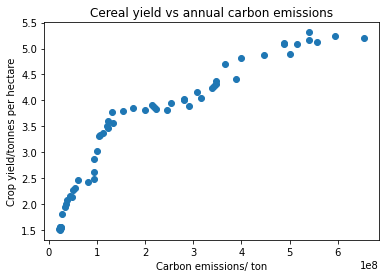

In [5]:
# visualization with analysis
plt.title('Cereal yield vs annual carbon emissions')
plt.scatter(co2_df['CO2 Emission'], yield_df['Crop Yield'])
plt.ylabel('Crop yield/tonnes per hectare')
plt.xlabel('Carbon emissions/ ton')


The data points indicate a positive correlation between carbon emissions and cereal yield. 

As annual carbon emissions increase, cereal yield also tends to increase which is intuitive since plenty of agricultural practices release significant carbon emissions, from the use of fertilizer to the emissions from machinery and livestock.

The initial relationship appears to be non-linear, with the growth in yield slowing as emissions increase beyond a certain point, possibly due to diminishing returns.

Text(0.5, 0, 'Precipitaion/ milimeter')

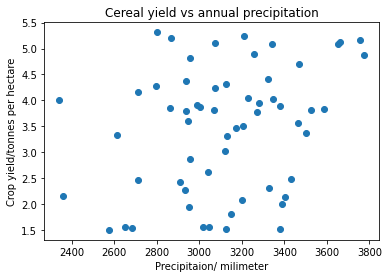

In [6]:
plt.title('Cereal yield vs annual precipitation')
plt.scatter(rain_df['Annual precipitation'], yield_df['Crop Yield'])
plt.ylabel('Crop yield/tonnes per hectare')
plt.xlabel('Precipitaion/ milimeter')

The data points do not show a strong or clear linear relationship between precipitation and cereal yield.

The points are scatted such that for similar precipitation levels, cereal yield varies significantly.

Perhaps the current irrigation systems utilized are independent from rainfall and sufficient water for crop growth is already delivered through existing systems.

Text(0.5, 0, 'Machinery use/ horsepower per 1000 hectares')

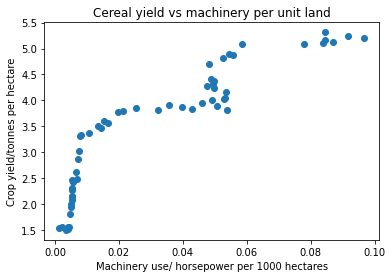

In [7]:
plt.title('Cereal yield vs machinery per unit land')
plt.scatter(machine_use_df['Machinery Use Per Area'], yield_df['Crop Yield'])
plt.ylabel('Crop yield/tonnes per hectare')
plt.xlabel('Machinery use/ horsepower per 1000 hectares')

There is a clear positive correlation between machinery use and cereal yield. 

As machinery use increases, cereal yield also increases, since productivity tends to increase with machine input as compared to manual labour.

The data points display diminishing returns since below 0.04 horsepower/1000 hectares, cereal yield increases rapidly before rate of growth slows.

### Features and Target Preparation

Prepare features and target for model training.

In [8]:
# put Python code to prepare your features and target

#Combining all relevant data into one dataframe
combined_df = rain_df.merge(machine_use_df, on='Year').merge(co2_df, on='Year').merge(yield_df, on='Year')

#Splitting columns into feature and target dataframes
def get_features_targets(df: pd.DataFrame, 
                         feature_names: list[str], 
                         target_names: list[str]) -> tuple[pd.DataFrame, pd.DataFrame]:
    df_feature = pd.DataFrame(df[feature_names[:]])
    df_target = pd.DataFrame(df[target_names[:]])
    return df_feature, df_target

df_features, df_target = get_features_targets(combined_df, ["Annual precipitation", "Machinery Use Per Area", "CO2 Emission"], ["Crop Yield"])

#Randomly splitting the targets and features into training dataframes and testing dataframes
def split_data(df_feature: pd.DataFrame, df_target: pd.DataFrame, 
               random_state: Optional[int]=None, 
               test_size: float=0.5) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    np.random.seed(random_state)
    
    df_feature_train=df_feature.copy()
    df_target_train=df_target.copy()

    arridx=np.random.choice(df_feature.shape[0],int(test_size*df_feature_train.shape[0]),replace=False)

    df_feature_test=df_feature_train.loc[arridx]
    df_feature_train.drop(arridx,inplace=True)
    
    df_target_test=df_target_train.loc[arridx]
    df_target_train.drop(arridx,inplace=True)
    return df_feature_train, df_feature_test, df_target_train, df_target_test

df_feature_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)

#normalizing the features and extracting stats
def normalize_z(array: np.ndarray, 
                columns_means: Optional[np.ndarray]=None, 
                columns_stds: Optional[np.ndarray]=None) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    if columns_means is None:
        columns_means=np.mean(array,axis=0)
    if columns_stds is None:
        columns_stds=np.std(array,axis=0)
        
    out = (array-columns_means)/columns_stds
    return out, columns_means, columns_stds

array_features_train_z, means, stds = normalize_z(df_feature_train)

#preparing the feature numpy array to include the intercept term β0
def prepare_feature(np_feature: np.ndarray) -> np.ndarray:
    one_column = np.ones((np_feature.shape[0], 1))
    return np.concatenate((one_column, np_feature), axis=1)

#converting target into numpy array
X: np.ndarray = prepare_feature(array_features_train_z)
target: np.ndarray = df_target_train.to_numpy()

### Building Model

Use python code to build your model mathematically without provided pre-made functions.

Set the variable iterations as the number of iterations that the gradient descent algorithm will run to determine the beta coefficients.

Set the variable alpha as the learning rate, determining the degree of correction each iteration performs to find the lowest cost function.

Set the variable beta, a numpy array that contains 0s initially and will eventually contain the coefficients of the independent variables.

In [10]:
iterations: int = 1500
alpha: float = 0.01
beta: np.ndarray = np.zeros((4,1))

The function calc_linreg() takes in the numpy array X, which is the matrix of feature values, and the numpy array beta, which contains the coefficients of the independent variables.

It multiplies the 2 matrixes to get a numpy array of the predicted target value, y_hat.

In [11]:
#gradient_descent function
def calc_linreg(X: np.ndarray, beta: np.ndarray) -> np.ndarray:
    return np.matmul(X, beta)

The compute_cost_linreg() function calculates the cost function, stored in the variable J.

The variable m stores the number of rows in the numpy array X, representing the number of samples in the dataset.

The variable y_hat stores the predicted target value.

The variable J stores the cost function, calculated by summing the square of the differences between y_hat and the actual y target value, before dividing it by 2m.

However, to ensure that the return value is always a scalar and not a nested array, np.squeeze() is called.

In [12]:
def compute_cost_linreg(X: np.ndarray, y: np.ndarray, beta: np.ndarray) -> np.ndarray:
    m = X.shape[0]
    y_hat = calc_linreg(X, beta)
    J = np.sum((y_hat - y)**2) / (2*m)
    return np.squeeze(J)

The gradient_descent_linreg() function essentially iteratively computes the cost function stored in the variable 'cost'.

It checks if the current iteration's cost matches the last stored cost function in the array J_storage.

If the cost function value is the same, it means the cost function has stagnated and the lowest cost has been found, so it exits the loop.

If the cost function value's magnitude is too large, exit the loop so that the learning rate can be re-adjusted so that it doesn't overshoot.

It then stores this iteration's cost function in the array J_storage.

This iterations predicted y_hat value is generated by calling calc_linreg().

Finally, beta updates itself by subtracting the product of the gradient of the cost function and the learning rate.

This gradient of the cost function is computed through 1/total number of values multiplied by the residuals (y_hat - y) and the transpose of the X feature matrix.

The subtraction aims to keep the cost function as low as possible within the set iterations so that the model's predictions are as accurate as possible with the correct coefficients of the independent variables.

It returns the final beta value and J_storage array of the cost functions.

In [13]:
def gradient_descent_linreg(X: np.ndarray, y: np.ndarray, beta: np.ndarray, 
                            alpha: float, num_iters: int) -> tuple[np.ndarray, np.ndarray]:
    J_storage = np.zeros((num_iters, 1))
    #print('this is J_storage: ', J_storage)
    m = X.shape[0]
    #print(f'this is m: {m}')
    for i in range(num_iters):
        cost = compute_cost_linreg(X, y, beta)
        if cost == J_storage[-1]:
            print('cost function values stagnated')
            return beta, J_storage
        J_storage[i] = cost
        if i > 0 and abs(cost) > 1000000000:
            print(f"Cost is too large at iteration {i}, stopping early.")
            print(J_storage)
            return beta, J_storage
        y_hat = calc_linreg(X, beta)
        beta = beta - (alpha / m) * (np.matmul(X.T, (y_hat - y)))

    return beta, J_storage

beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)

The predict_linreg() function normalizes the array_features, which is index 0 of normalize_z() output.

If the normalized array is not a numpy array, it converts it into one through np.asarray.

The prepare_feature() function is called which adds a column of ones to the feature matrix for the intercept terms.

The calc_linreg() function is then called to multiply the array_feature matrix with the beta coefficient matrix to obtain a numpy array of predicted y_hat values.

In [14]:
def predict_linreg(array_feature: np.ndarray, beta: np.ndarray, 
                   means: Optional[np.ndarray]=None, 
                   stds: Optional[np.ndarray]=None) -> np.ndarray:
    array_feature = np.asarray(normalize_z(array_feature, means, stds)[0])
    array_feature = prepare_feature(array_feature)
    return calc_linreg(array_feature, beta)

# call the predict() method with established coefficients to generate predicted Y_cap values
pred: np.ndarray = predict_linreg(df_features_test, beta, means, stds)

### Evaluating the Model

- Describing the chosen metrics
- Evaluating model performance

In [15]:
# put Python code to test & evaluate the model

#Check accuracy of predicted Y_cap values via r^2 and MSE
def r2_score(y: np.ndarray, ypred: np.ndarray) -> float:
    y_mean = np.mean(y)
    SStot = np.sum((y - y_mean) ** 2)
    SSres = np.sum((y - ypred) ** 2)
    r2 = 1 - (SSres / SStot)
    return r2

def mean_squared_error(target: np.ndarray, pred: np.ndarray) -> float:
    MSE = np.mean((target - pred) ** 2)
    return MSE

target: np.ndarray = df_target_test.to_numpy()
r2: float = r2_score(target, pred)
print(f'this is the r2 score {r2}')

mse: float = mean_squared_error(target, pred)
print(f'this is the mean squared error {mse}')


this is the r2 score 0.849117645813564
this is the mean squared error 0.2548055209970702


Our chosen metrics would be the R^2 value and the Mean Squared Error(MSE).

The R^2 gives a measure of how well the total spread of the crop yield data values can be explained by the model and its inputs.
Also, the R^2 metric is unitless and always between the values 0 to 1, which makes it straightforward to compare across different models and datasets.

On the other hand, the MSE measures the average squared difference between predicted and actual values, quantifying the magnitude of prediction errors.
Since it squares the difference, MSE is more sensitive to large gaps between the actual and predicted because all gaps are calculated to the power of 2.

In terms of performance, our model has attained an R^2 of approximately 0.8491, hence accounting for about 85% of the variability in crop yield due to machinery, precipitation and carbon emissions.
However, the unexplained variance of 15% could be due to the non-linear nature of the relationship between yield and precipitaion.

Meanwhile, the model also attained a MSE of 0.2548055209970702, which is realtively low. 
For better comparison, finding the normalized RMSE converts the error to the same units as the crop yield for comparison.
Normalized RMSE = (MSE^0.5)/(Max(y) - Min(y))
The current normalized RMSE value is 0.1298 which means the model's errors account for approximately 13% of the total range of crop yield, which is relatively small.

### Improving the Model

- Improve the model through hyperparameter tuning.


In [16]:
# Re-iterate the steps above with improvement
#include function that implements polynomials into the equation
def transform_features(df_feature: pd.DataFrame, 
                       colname: str, 
                       colname_transformed: str,
                       power) -> pd.DataFrame:
    #df_feature[colname_transformed] = np.square(df_feature[colname])
    df_feature[colname_transformed] = np.power(df_feature[colname], power)
    return df_feature

combined_df = rain_df.merge(machine_use_df, on='Year').merge(co2_df, on='Year').merge(yield_df, on='Year')
df_features, df_target = get_features_targets(combined_df, ["Annual precipitation", "Machinery Use Per Area", "CO2 Emission"], ["Crop Yield"])

#INTRODUCE POLYNOMIAL MODELLING TO BETTER REPRESENT RELATIONSHIP BTW FEATURE AND TARGET
df_features = transform_features(df_features, "Machinery Use Per Area", "Machinery Use Per Area", 3)
df_features = transform_features(df_features, "CO2 Emission", "CO2 Emission", 0.5)

#Randomly splitting the targets and features into training dataframes and testing dataframes
df_feature_train, df_features_test, df_target_train, df_target_test = split_data(df_features, df_target, random_state=100, test_size=0.3)
#normalizing the features and extracting stats
array_features_train_z, means, stds = normalize_z(df_feature_train)

#converting target into numpy array
X: np.ndarray = prepare_feature(array_features_train_z)
target: np.ndarray = df_target_train.to_numpy()

#Gradient descent to find coefficents beta and lowest cost function
iterations: int = 1500
alpha: float = 0.01
beta: np.ndarray = np.zeros((4,1))
# Call the gradient_descent function
beta, J_storage = gradient_descent_linreg(X, target, beta, alpha, iterations)

pred: np.ndarray = predict_linreg(df_features_test, beta, means, stds)

target: np.ndarray = df_target_test.to_numpy()
r2: float = r2_score(target, pred)
print(f'this is the r2 score {r2}')

mse: float = mean_squared_error(target, pred)
print(f'this is the mean squared error {mse}')


this is the r2 score 0.94819577918076
this is the mean squared error 0.08748538917535241


Given that the initial relationship between crop yield and carbon emissions was a positive correlation with diminishing returns the greater amount of emissions, a square root transformation of x^0.5 was applied on the carbon emission values.

Slowing down the rate of growth such that the linear line becomes a concave curve ensured that the predicted y_hat crop yield values rose rapidly for smaller values of carbon emission but experienced a decreasing rate of growth as the emissions grew larger, resulting in more accurate predicted y_hat values.

The initial relationship between crop yield and machinery was also a positive correlation but with a much steeper increase, nearly a vertical line. Due to this steepness, it is necessary to transform the independent variable in order to more accurately capture the graphical pattern.

Initially, a transformation of x^2 was applied to attempt to capture this steep graphical pattern. However, the pattern was still not accurately captured.

Hence, to further improve the equation, a more effective transformation of x^3 was applied to attempt to capture that initial accelerating impact as this presented the most accurate graph.

### Discussion and Analysis


As a result of implementing polynomial modelling, both chosen metrics experienced great improvement.

The R^2 value increased from 0.849117645813564 to 0.94819577918076, while the MSE fell from 0.2548055209970702 to 0.08748538917535241, indicating a significant improvement in accuracy.

The new R^2 can account for about 95% of the variability in crop yield due to machinery, precipitation and carbon emissions.

The new normalized RMSE would then be 0.0761 which means the model's errors account for approximately 7.6% of the total range of crop yield, which is very good.


In conclusion, our analysis shows that CO2 emissions significantly influence cereal yield, while precipitation and farm machinery have weaker impacts. 

These findings suggest a shift in focus toward addressing other factors such as fertilizer use, livestock quantity or soil quality.

All in all, our model performs to a high degree of accuracy in predicting crop yields based on the input factors, allowing it to serve as a reliable tool in forecasting returns while also enabling our users to keep track and quantify their impact on the environment.